In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir('../ParticleSwarmOptimization/')

In [3]:
fitness_vals = np.loadtxt('earm_kds_pso_fitness_vals_200_20000_4.txt')
ranked_pop = np.loadtxt('earm_kds_ranked_pop_200_20000_4.txt')

In [4]:
fitness_vals[-50::]

array([ 2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927597,  2385.86927597,  2385.86927597,
        2385.86927597,  2385.86927459,  2385.86927459,  2385.86927459,
        2385.86927459,  2385.86927459,  2385.86927459,  2385.86927459,
        2385.86927459,  2385.86927459])

In [15]:
np.save('earm_kds_restart_pop_50_fitness=2385.npy', ranked_pop[:50])

In [4]:
os.chdir('../moo_and_mcmc/emcee/')

In [5]:
from earm_uniform_emcee import log_post

In [6]:
pop_fitness = np.zeros(len(ranked_pop))

In [7]:
for n_param in range(len(ranked_pop)):
    pop_fitness[n_param] = log_post(ranked_pop[n_param])

prior:  -282.479411206  like:  -2103.38992126  post:  -2385.86933246
prior:  -282.479411206  like:  -2103.39003454  post:  -2385.86944575
prior:  -282.479411206  like:  -2103.39034172  post:  -2385.86975292
prior:  -282.479411206  like:  -2103.39045448  post:  -2385.86986568
prior:  -282.479411206  like:  -2103.39101175  post:  -2385.87042295
prior:  -282.479411206  like:  -2103.39186751  post:  -2385.87127871
prior:  -282.479411206  like:  -2103.39559358  post:  -2385.87500479
prior:  -282.479411206  like:  -2103.39569993  post:  -2385.87511114
prior:  -282.479411206  like:  -2103.39929238  post:  -2385.87870358
prior:  -282.479411206  like:  -2103.40771661  post:  -2385.88712782
prior:  -282.479411206  like:  -2103.40818991  post:  -2385.88760112
prior:  -282.479411206  like:  -2103.40835295  post:  -2385.88776416
prior:  -282.479411206  like:  -2103.40843088  post:  -2385.88784209
prior:  -282.479411206  like:  -2103.40843406  post:  -2385.88784526
prior:  -282.479411206  like:  -21

In [17]:
len(pop_fitness[pop_fitness > -2400])

139

In [8]:
good_pop = ranked_pop[:139]

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


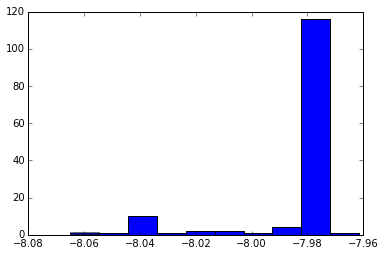

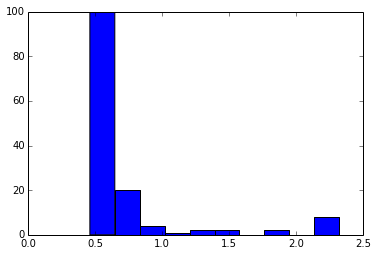

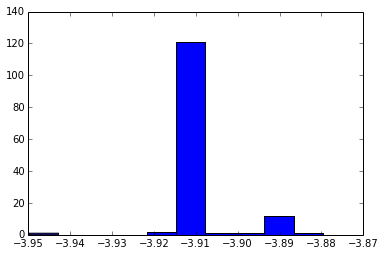

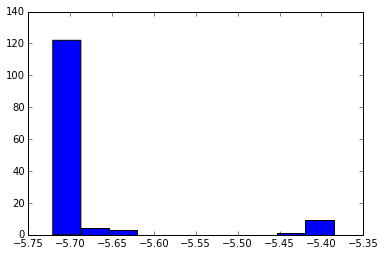

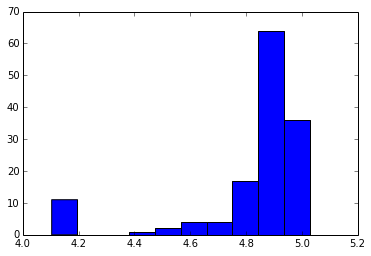

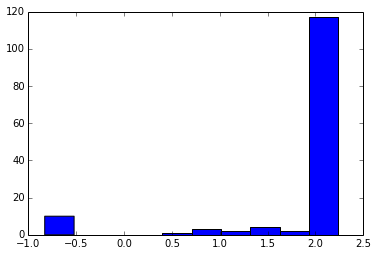

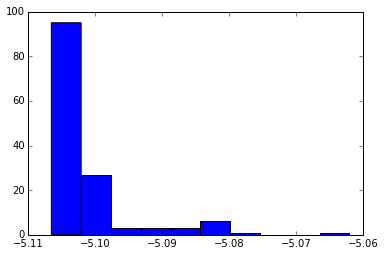

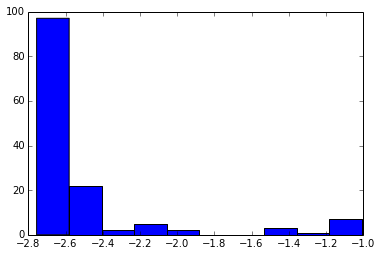

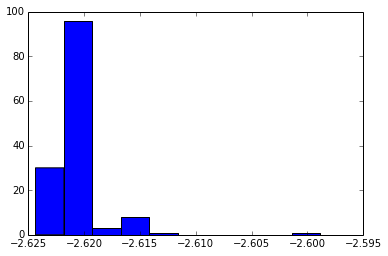

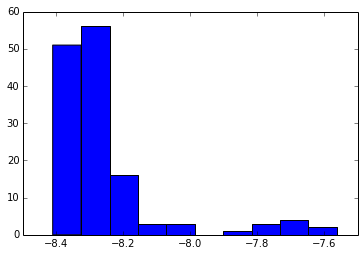

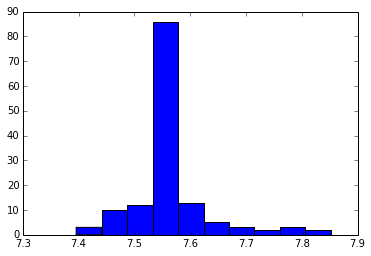

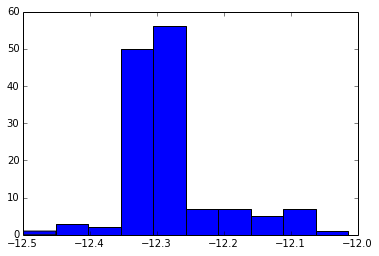

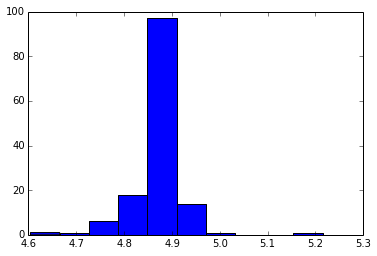

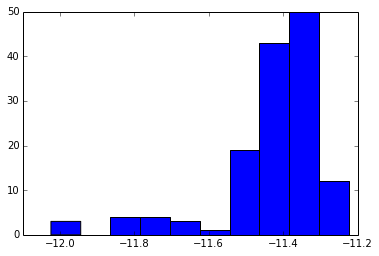

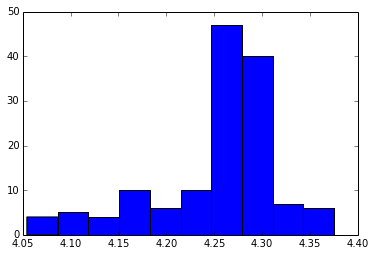

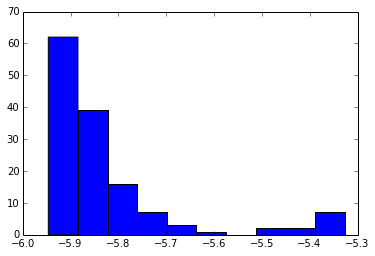

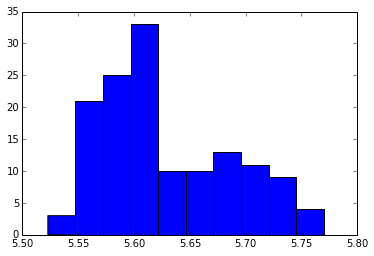

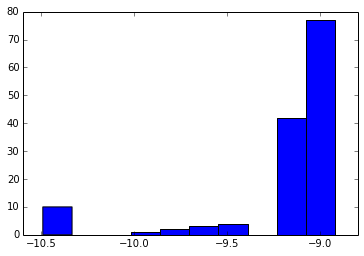

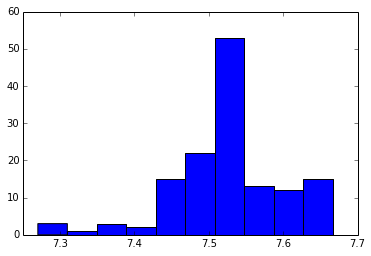

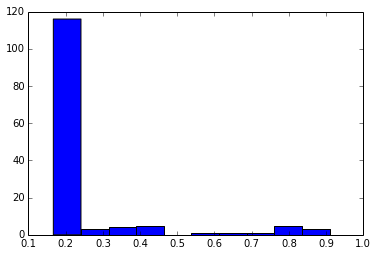

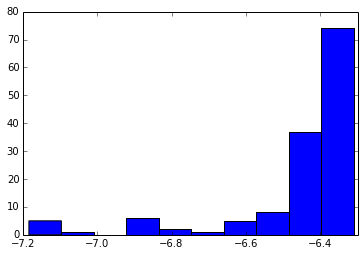

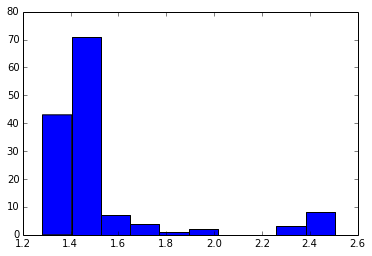

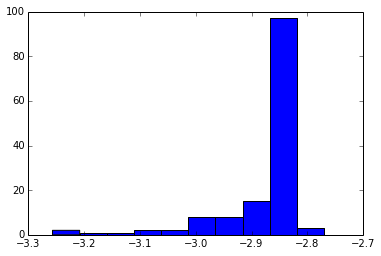

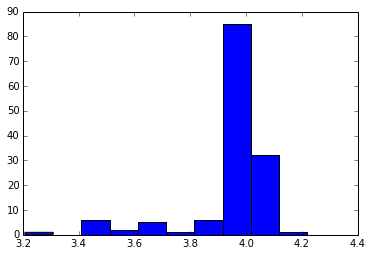

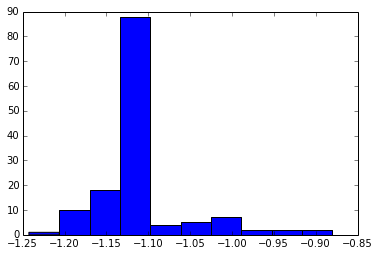

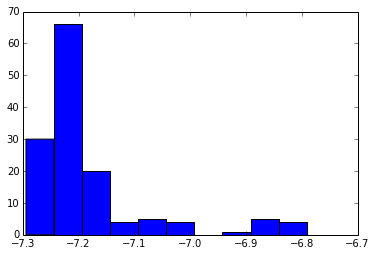

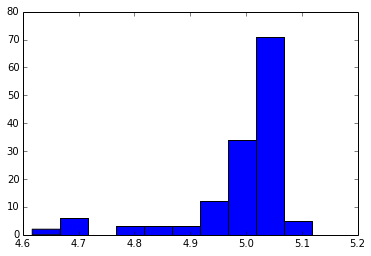

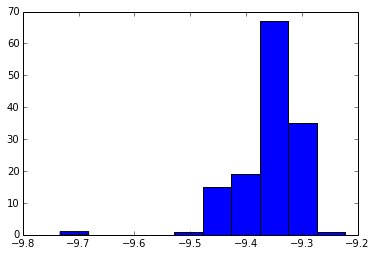

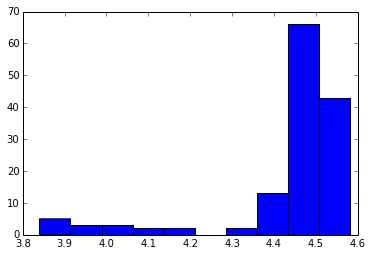

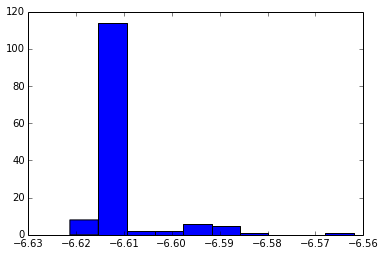

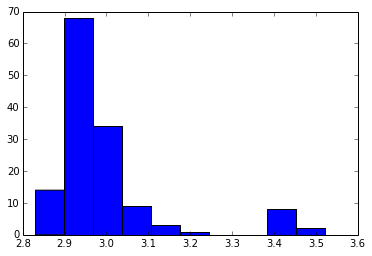

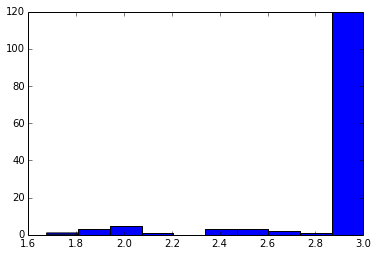

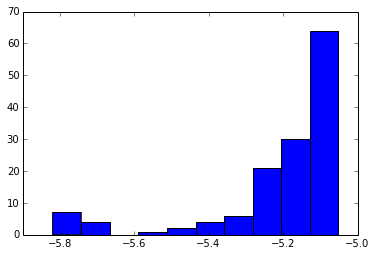

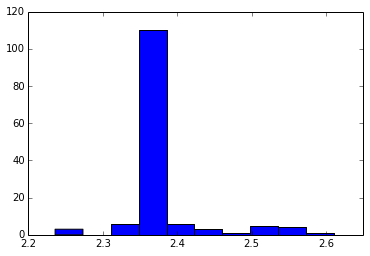

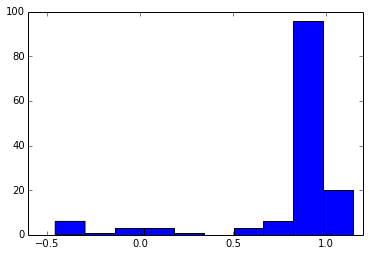

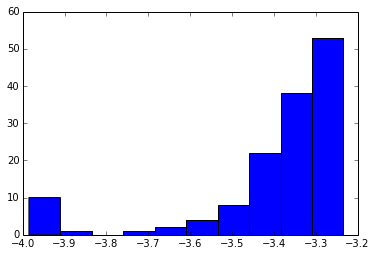

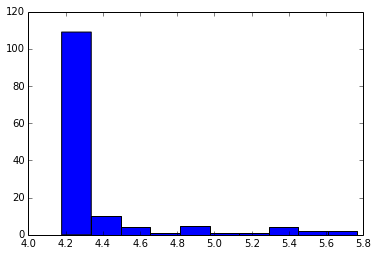

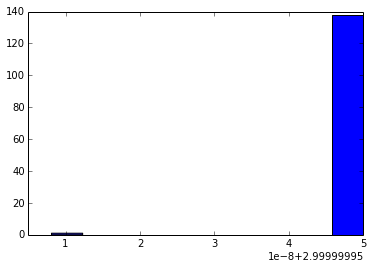

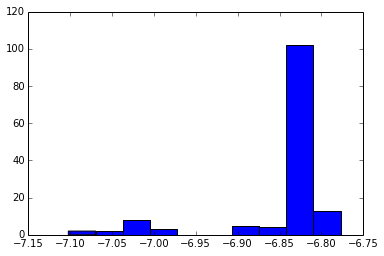

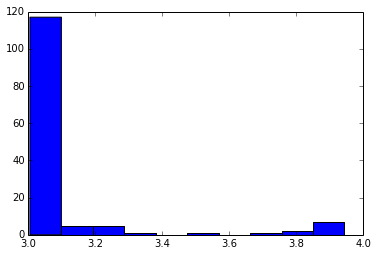

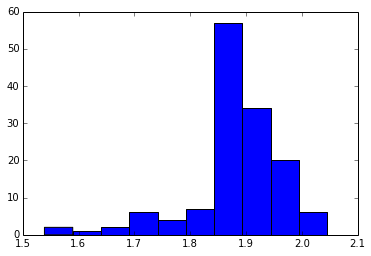

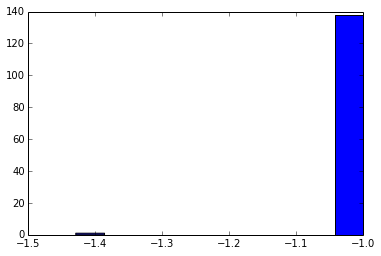

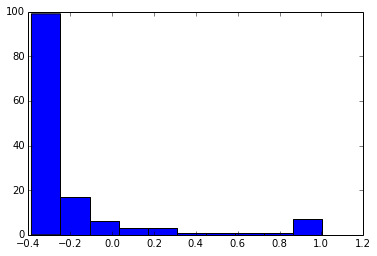

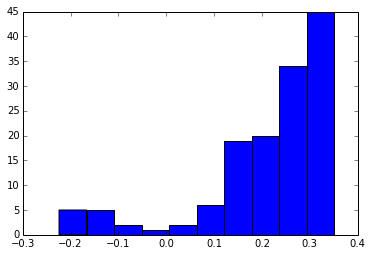

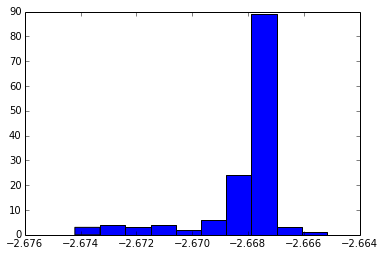

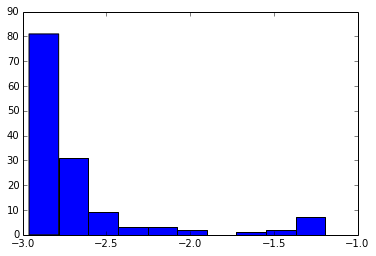

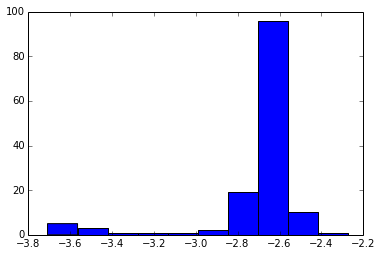

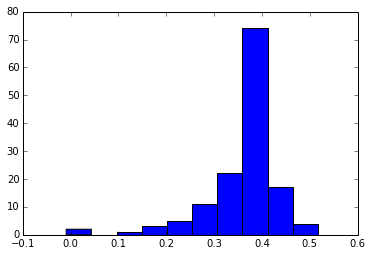

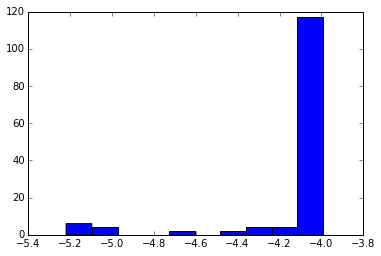

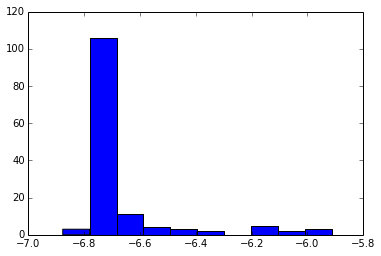

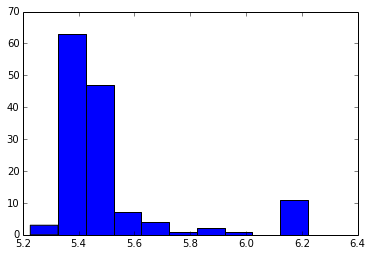

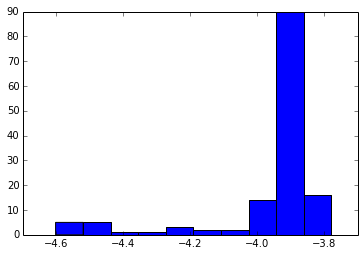

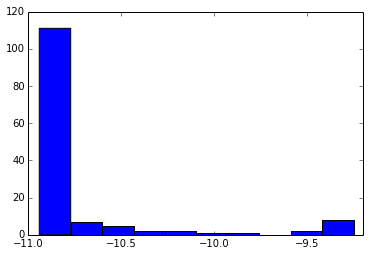

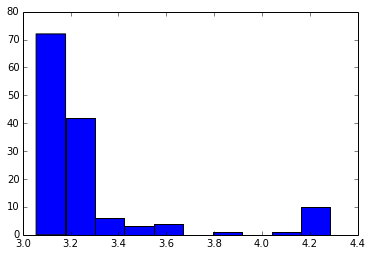

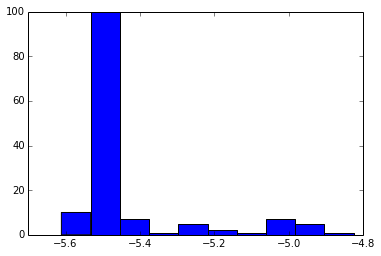

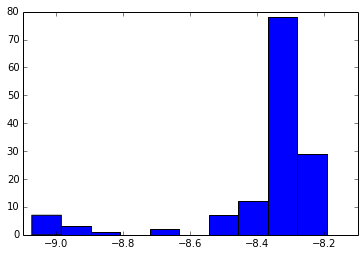

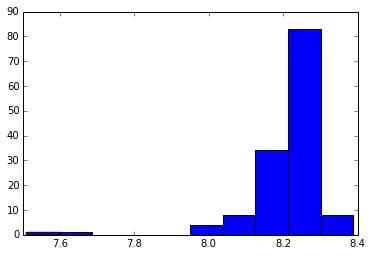

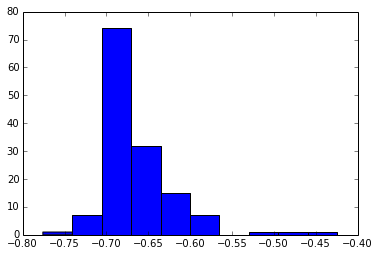

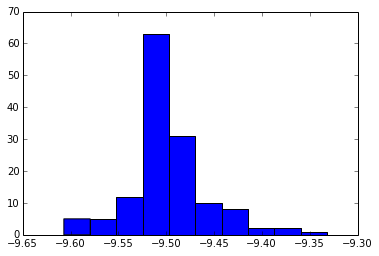

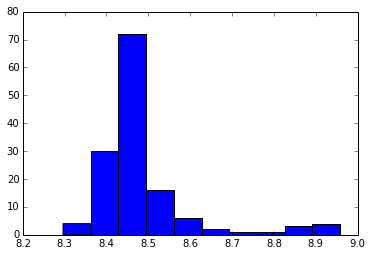

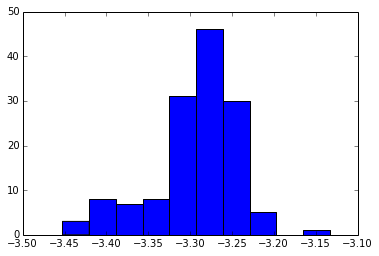

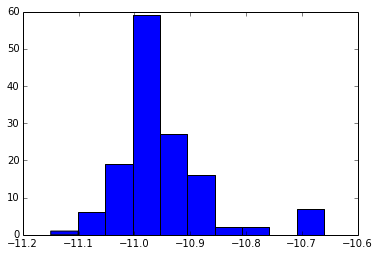

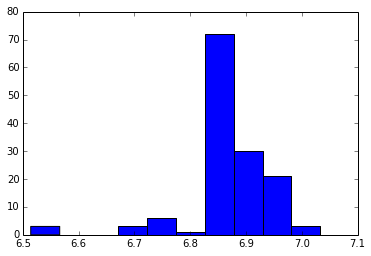

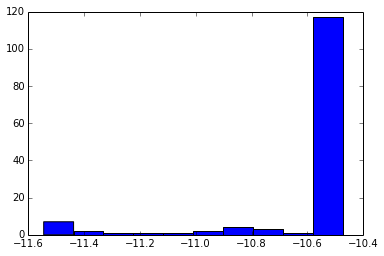

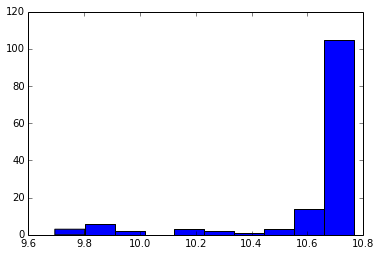

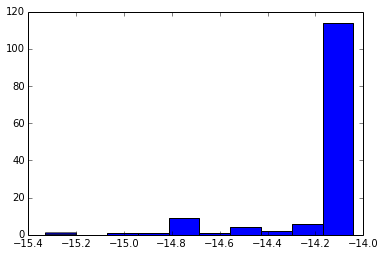

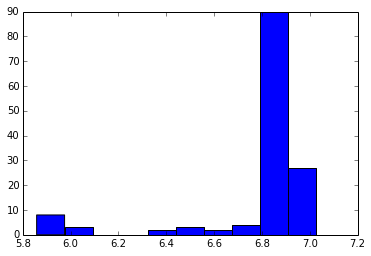

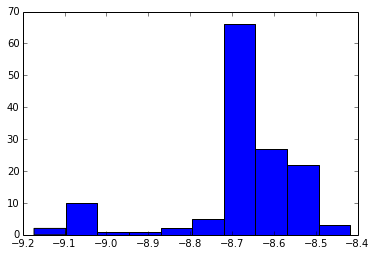

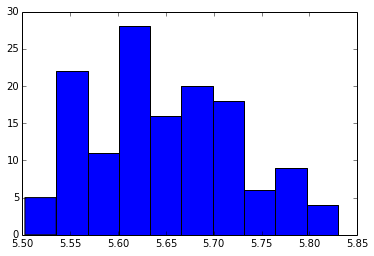

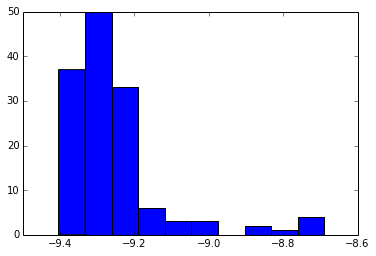

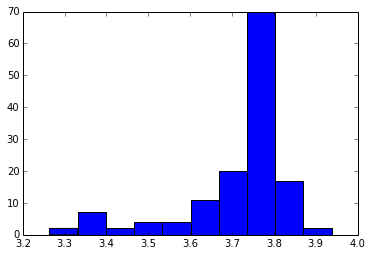

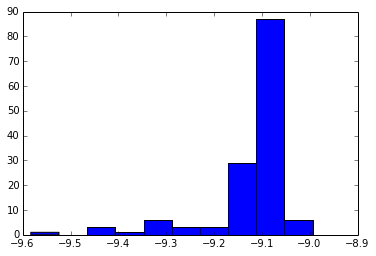

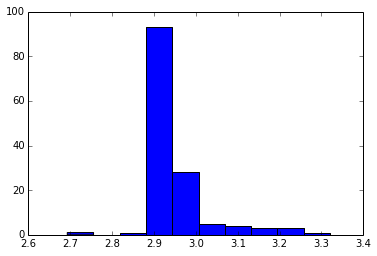

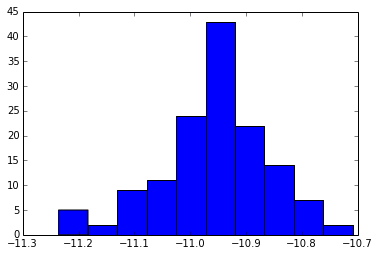

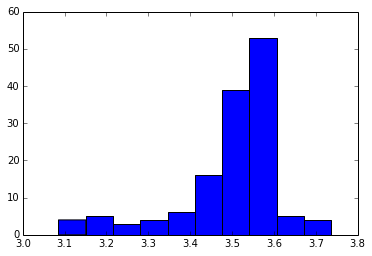

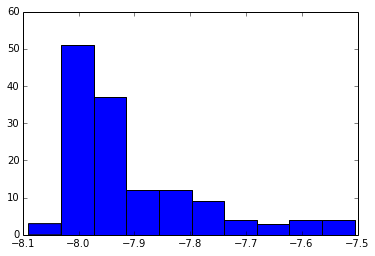

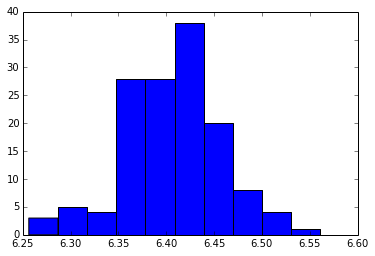

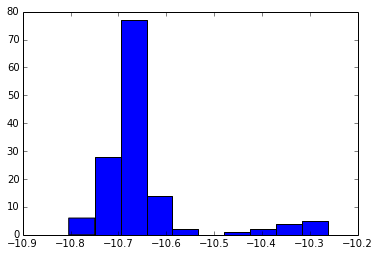

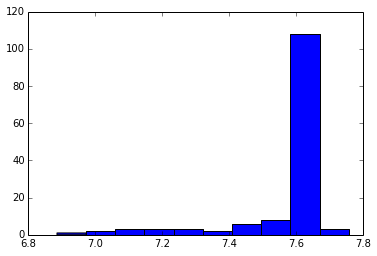

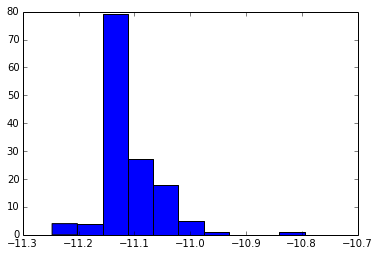

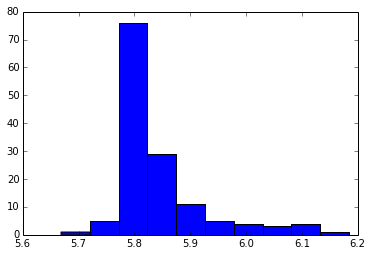

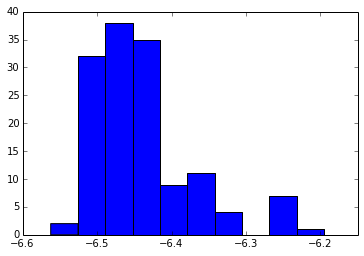

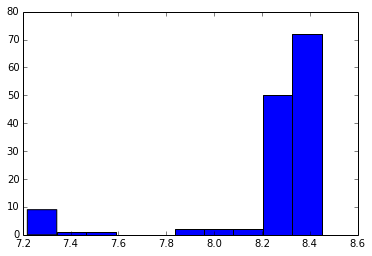

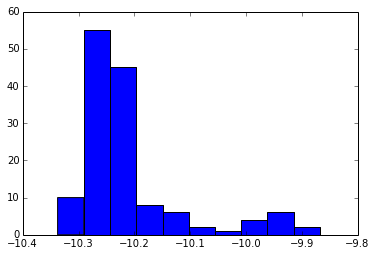

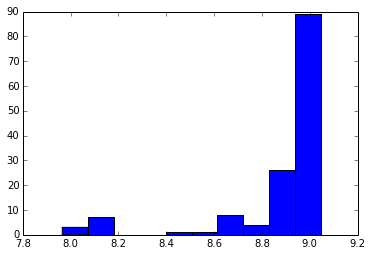

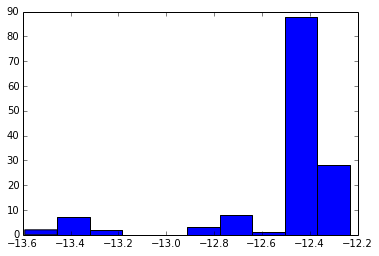

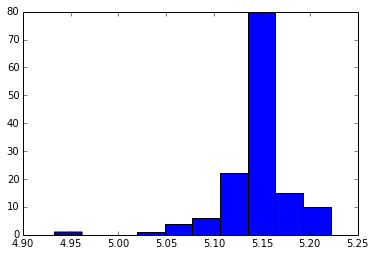

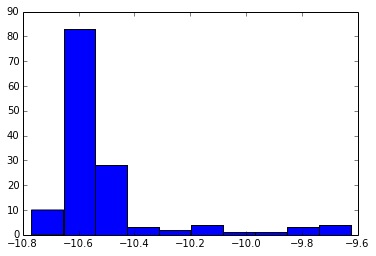

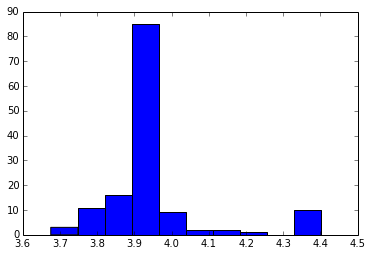

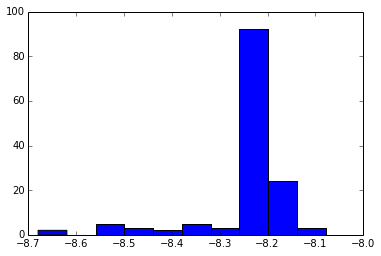

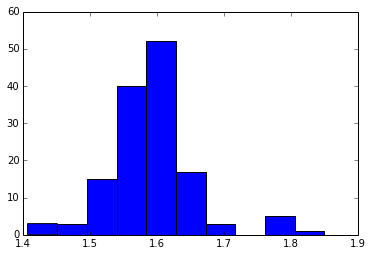

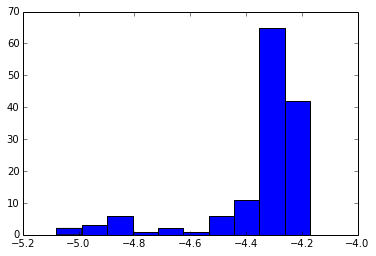

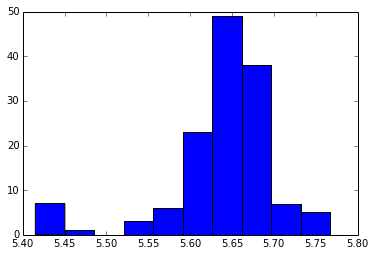

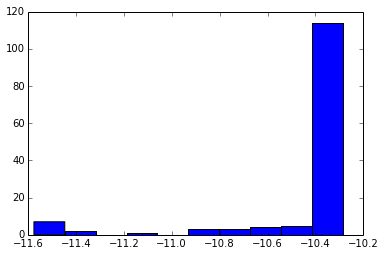

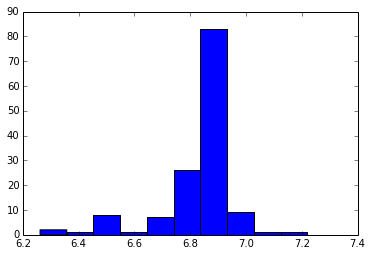

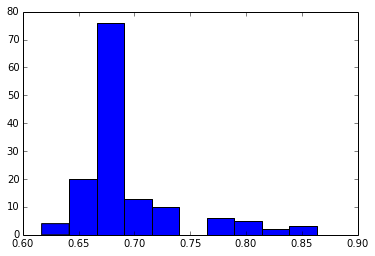

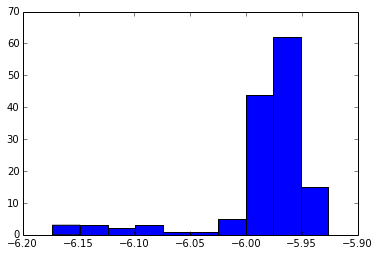

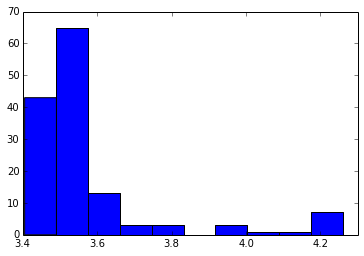

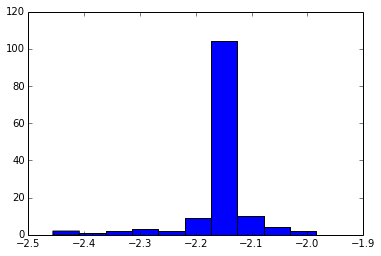

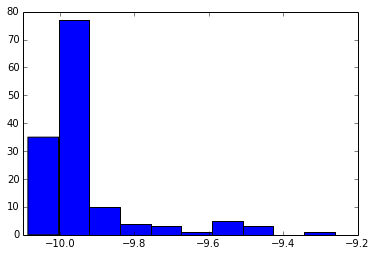

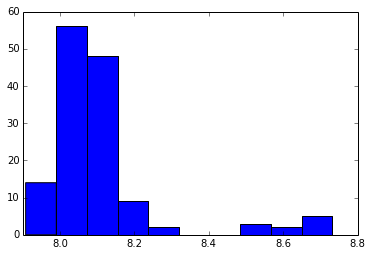

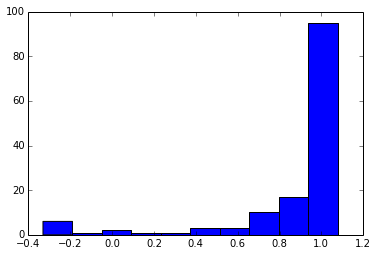

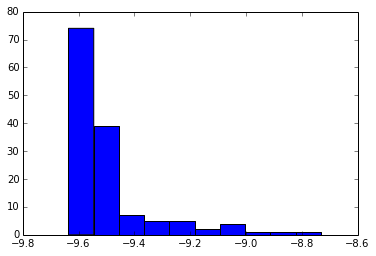

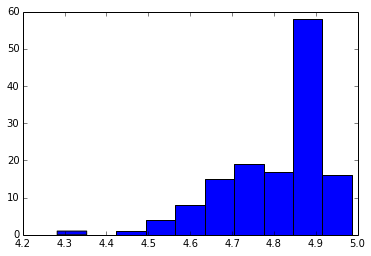

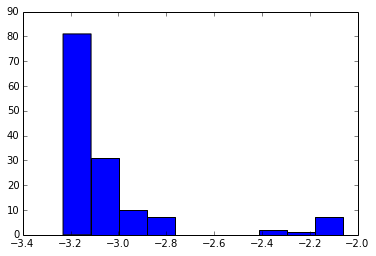

In [9]:
param_hists = []
ranges = np.zeros(good_pop.shape[1])
for dim in range(good_pop.shape[1]):
    ranges[dim] = np.ptp(good_pop[:,dim])
    fig = plt.figure()
    plt.hist(good_pop[:,dim])
    param_hists.append(fig)

In [11]:
np.save('earm_kds_ranges_200_20000_4.npy', ranges)